In [134]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
phm_df = pd.read_parquet('../feature_extracts/', engine='fastparquet')


In [66]:
phm_df

,index,fault_class,individual,pdmp,pin,po,pdmp_avg_first_150,pdmp_avg_last_150,pdmp_avg_mid_300,pdmp_avg_diff,...,pin_kurtosis,po_avg_first_150,po_avg_last_150,po_avg_mid_300,po_avg_diff,po_size,po_total_avg,po_variance,po_skew,po_kurtosis
0,22776,3,5,"[-0.194942, -0.187465, -0.180348, -0.173447, -...","[-1.731534, -1.755668, -1.738321, -1.691324, -...","[0.230999, 0.146074, 0.045333, -0.082227, -0.2...",-0.380677,0.166427,0.332923,-0.547104,...,0.752526,-0.992838,1.158301,0.111272,-2.151139,571.0,-0.149746,1.056277,0.571217,-1.485157
1,22777,8,5,"[-0.246213, -0.273524, -0.308485, -0.348401, -...","[-1.553456, -1.535349, -1.530819, -1.498527, -...","[0.267242, 0.181471, 0.066593, -0.058671, -0.1...",-0.416614,0.107498,0.379532,-0.524112,...,0.745448,-0.968079,1.102492,0.167849,-2.070571,571.0,-0.123757,1.060788,0.486906,-1.575010
2,22778,4,5,"[0.276173, 0.256051, 0.233923, 0.207697, 0.179...","[-1.322575, -1.380218, -1.382825, -1.375426, -...","[0.470566, 0.445597, 0.413041, 0.369268, 0.310...",-0.490820,0.388297,0.206089,-0.879116,...,1.119317,-0.948846,1.116603,0.151208,-2.065449,571.0,-0.122784,1.044903,0.499660,-1.561296
3,22779,2,5,"[0.0658, 0.057669, 0.051469, 0.047736, 0.04593...","[-1.409725, -1.365621, -1.333474, -1.283352, -...","[-0.102403, -0.197452, -0.314519, -0.436627, -...",-0.793932,0.596038,0.544159,-1.389970,...,0.453443,-1.204169,0.695525,0.649105,-1.899694,571.0,-0.008986,1.041080,-0.163733,-1.727554
4,22780,2,5,"[0.27768, 0.272525, 0.265093, 0.256061, 0.2469...","[-1.42767, -1.41073, -1.396357, -1.354666, -1....","[-0.0248, -0.119669, -0.252136, -0.41008, -0.5...",-0.804523,0.600944,0.530414,-1.405467,...,0.377425,-1.196517,0.688547,0.652022,-1.885065,571.0,-0.007443,1.033000,-0.165585,-1.718661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34140,34141,1,6,"[-0.051017, -0.055426, -0.061033, -0.070764, -...","[-1.191121, -0.940782, -0.640797, -0.310252, -...","[-0.559606, -0.681762, -0.706164, -0.698716, -...",-0.319361,0.209585,0.343784,-0.528946,...,1.131024,-1.016882,1.102886,0.207574,-2.119768,571.0,-0.113808,1.062574,0.484757,-1.594999
34141,34142,1,6,"[0.027704, 0.00884, -0.005844, -0.01568, -0.02...","[-1.671334, -1.706622, -1.711954, -1.683148, -...","[0.378552, 0.316211, 0.229241, 0.119138, -0.00...",-0.225832,0.278967,0.148029,-0.504800,...,1.041519,-0.960488,1.123885,0.173077,-2.084373,571.0,-0.115101,1.050273,0.501856,-1.560801
34142,34143,1,6,"[-0.037775, -0.053561, -0.073233, -0.097449, -...","[-1.728436, -1.737226, -1.713788, -1.683285, -...","[0.303343, 0.21896, 0.113885, -0.00383, -0.147...",-0.362291,0.274743,0.296034,-0.637034,...,0.819644,-0.977431,1.111738,0.173422,-2.089169,571.0,-0.120584,1.053842,0.498116,-1.566424
34143,34144,1,6,"[0.095459, 0.086675, 0.078642, 0.068852, 0.057...","[-1.537821, -1.593619, -1.599173, -1.589957, -...","[0.420105, 0.371285, 0.301655, 0.215862, 0.128...",-0.401902,0.333803,0.261973,-0.735706,...,1.012201,-0.966088,1.104226,0.180022,-2.070315,571.0,-0.115785,1.054297,0.475711,-1.586136


In [233]:
# Split the data into features (X) and target (y)
# X = phm_df.drop(columns=['pdmp', 'pin', 'po', 'fault_class', 'index', 'po_size', 'pdmp_size', 'pin_size'])
# X = phm_df[['individual', 'pdmp_skew', 'pin_skew', 'po_skew', 'pdmp_variance', 'pin_variance', 'po_variance', 'pdmp_kurtosis', 'pin_kurtosis', 'po_kurtosis']]
# X = phm_df[['individual', 'pdmp_variance', 'pin_variance', 'po_variance']]
X = phm_df[['individual', 'pdmp_total_avg', 'pin_total_avg', 'po_total_avg', 'pdmp_skew', 'pin_skew', 'po_skew']]
y = phm_df['fault_class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,individual,pdmp_total_avg,pin_total_avg,po_total_avg,pdmp_skew,pin_skew,po_skew
3474,5,-0.013554,0.093777,-0.138625,0.134941,-0.418068,0.538490
26489,2,-0.027888,0.017586,-0.188000,0.188103,-0.362095,0.642461
24203,2,-0.004902,0.008052,-0.212896,1.203427,-0.397648,0.753117
32139,6,-0.015920,0.107828,-0.112802,1.029317,-0.388569,0.499066
33031,6,-0.004386,0.086831,-0.099039,0.705201,-0.481280,0.446189
...,...,...,...,...,...,...,...
8464,4,-0.011540,0.065102,-0.146843,1.265051,-0.284905,0.584589
227,5,0.007053,0.080026,-0.113541,0.252829,-0.366147,0.452763
27742,2,-0.025481,0.023679,-0.181822,0.193216,-0.405482,0.635002
5379,5,-0.002788,0.072047,-0.128010,0.282202,-0.368005,0.494638


In [234]:
y_test

9844      4
30616     9
11305     7
9099      7
4419      9
         ..
11025     6
29982     7
32993    10
27616     7
32947     4
Name: fault_class, Length: 6829, dtype: int32

In [235]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [236]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [237]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse


1.286397173996571

In [238]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse


1.5875393393243755

In [239]:
y_pred = knn_model.predict(X_test)
y_pred


array([ 4,  9,  7, ..., 10,  8,  4], dtype=int32)

In [240]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8829989749597306


# CROSS-VALIDATION

In [141]:
k_values = [i for i in range (1,10)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))


1
2
3
4
5
6
7
8
9


Text(0, 0.5, 'Accuracy Score')

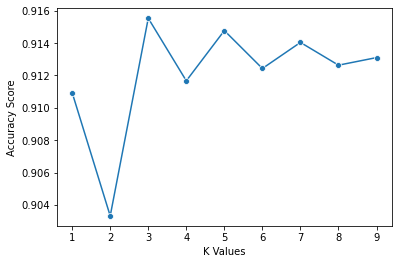

In [142]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")


In [143]:
scores

[0.9109386440181577,
 0.9033240591594669,
 0.9155366817982136,
 0.9116708156391858,
 0.9147752233123445,
 0.9124322741250548,
 0.9140430516913165,
 0.9126372821789428,
 0.9131058720164006]

In [144]:
np.mean(scores)

0.9120515448821204